In [1]:
import igraph
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

#### TASK 1

In [ ]:
# build regular graph and proove that possible click numbers
# are 1, 2, .., [n/2], n

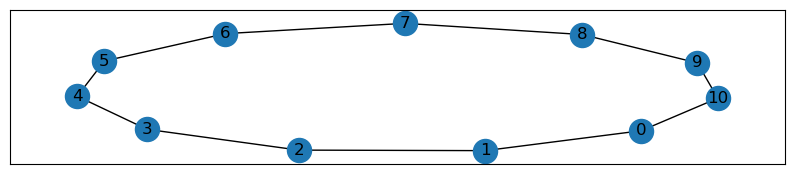

In [122]:
n = 11
circulant_graph = nx.circulant_graph(n=n, offsets=[1])

plt.figure(figsize =(10, 2))
nx.draw_networkx(circulant_graph, with_labels = True)

Allowed clique degrees = [-1, 1]


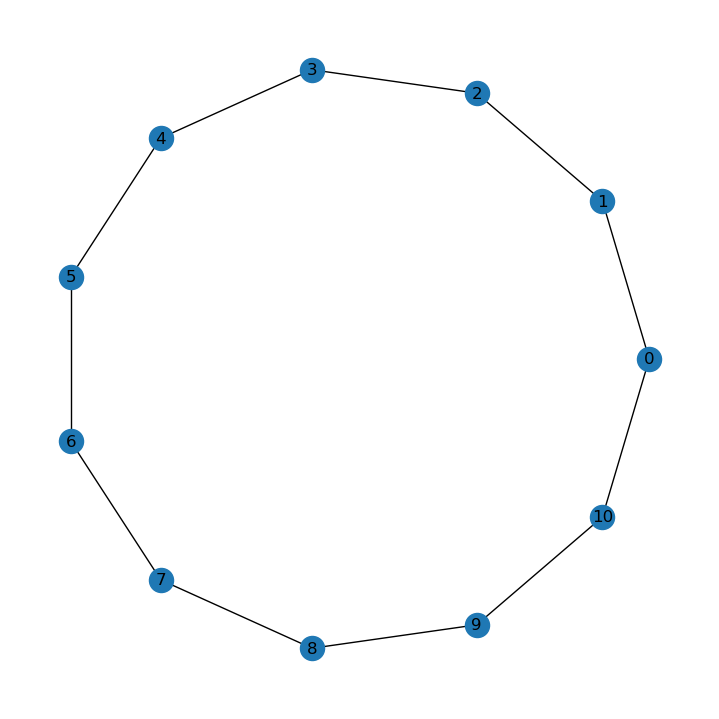

Allowed clique degrees = [-2, -1, 1, 2]


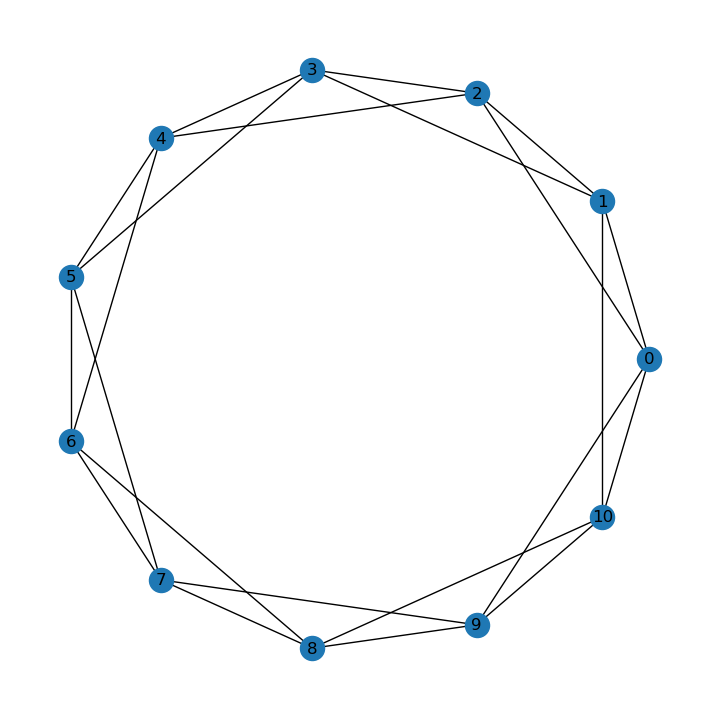

Allowed clique degrees = [-3, -2, -1, 1, 2, 3]


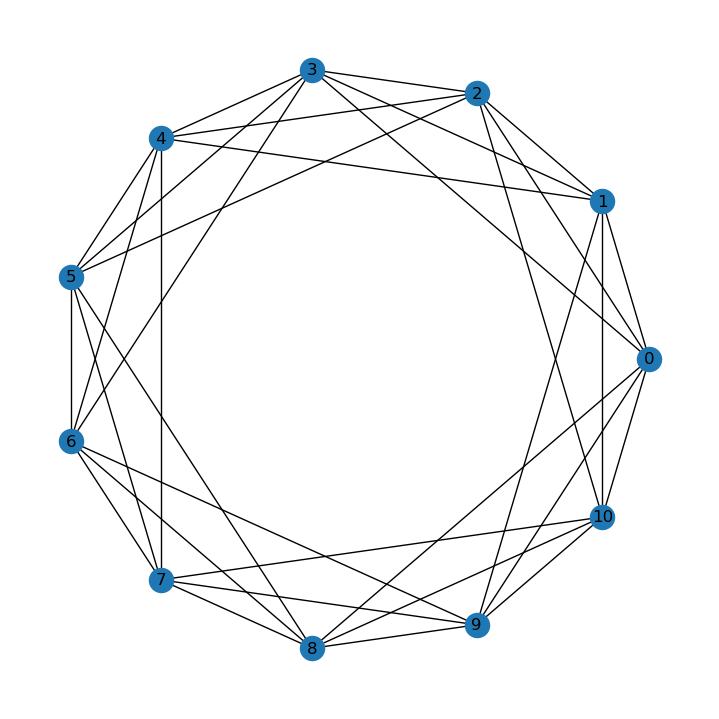

Allowed clique degrees = [-4, -3, -2, -1, 1, 2, 3, 4]


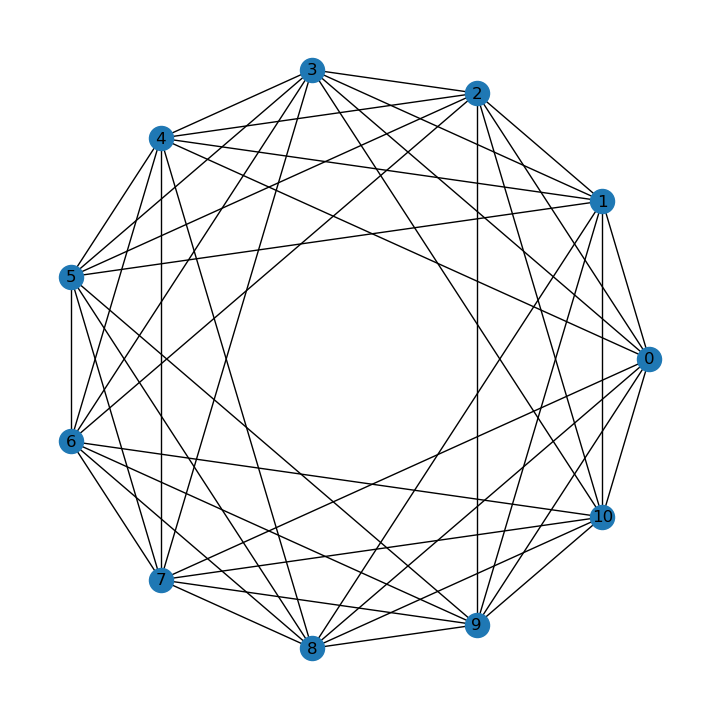

Allowed clique degrees = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]


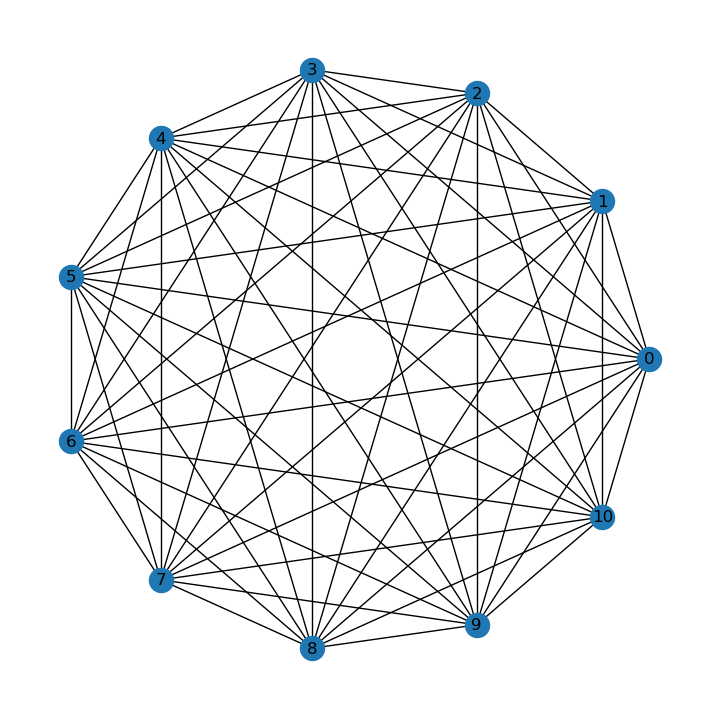

Allowed clique degrees = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]


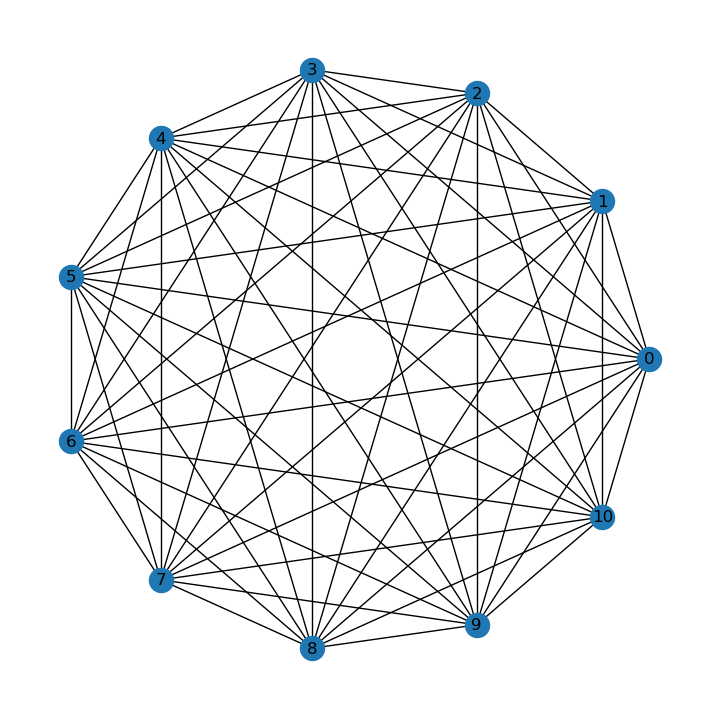

Allowed clique degrees = [-7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7]


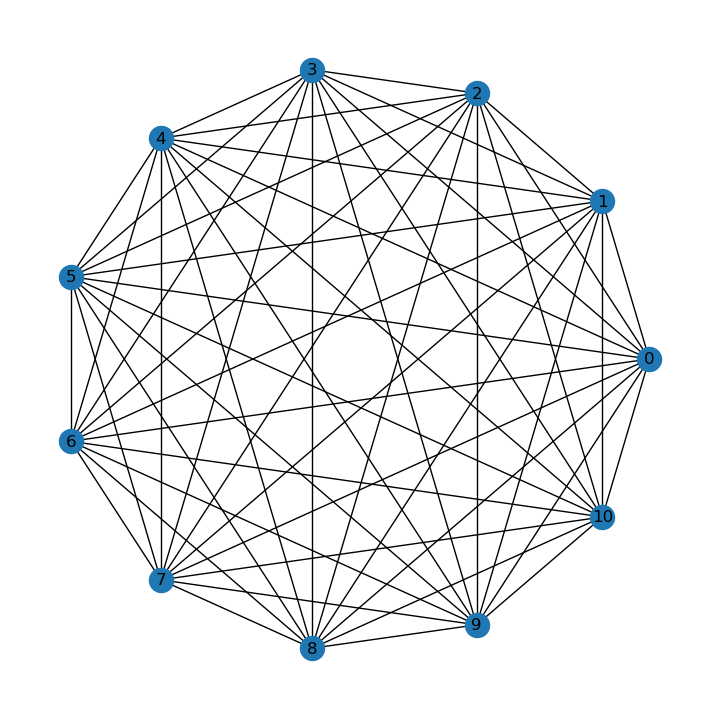

Allowed clique degrees = [-8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8]


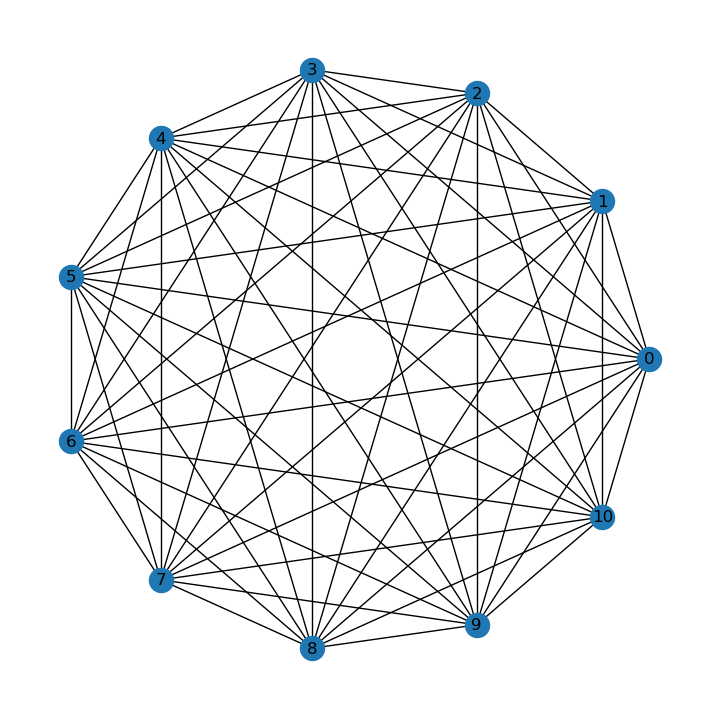

Allowed clique degrees = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9]


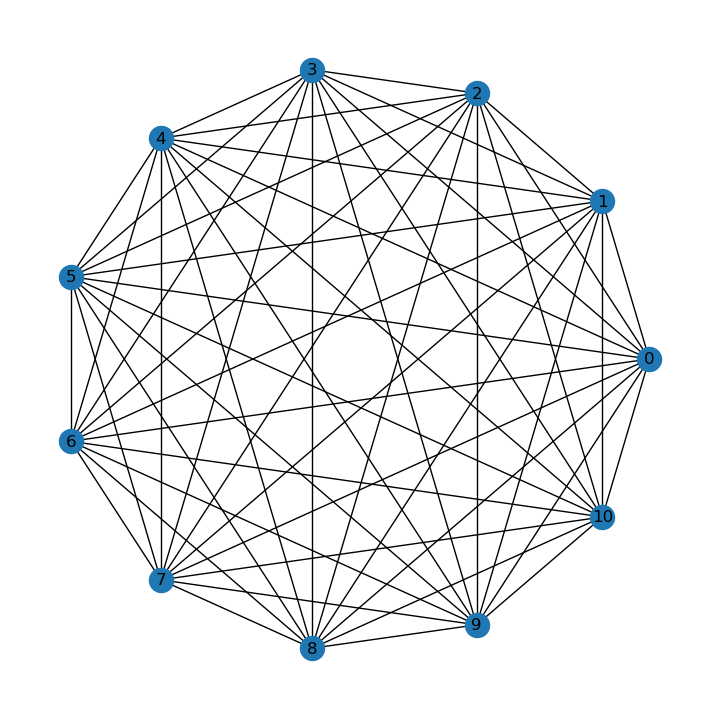

Allowed clique degrees = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


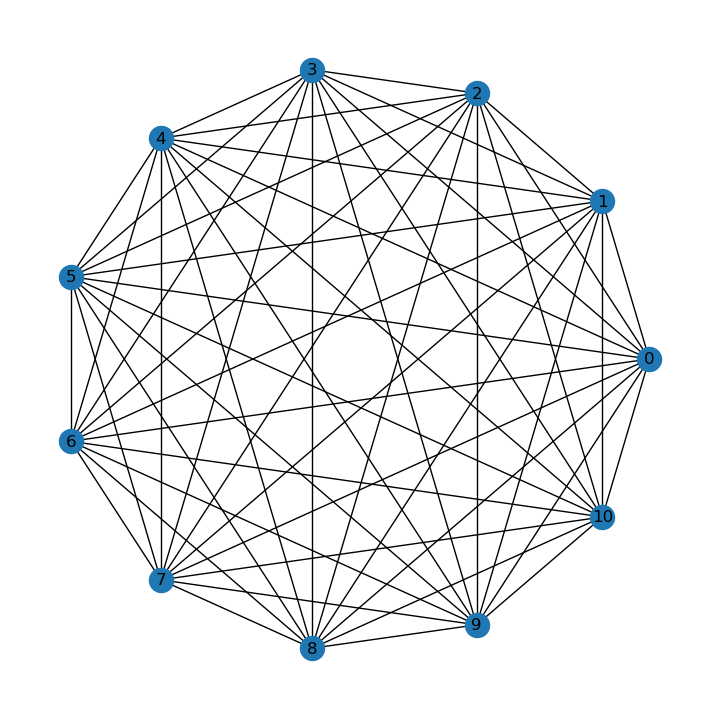

In [123]:
# create regular graph
adjacency_dict = dict( circulant_graph.adjacency() )
clique_degrees = [k for k in range(1, n)]
dict_of_regular_graphs = {}

for allowed_clique in clique_degrees:
    circulant_graph = nx.circulant_graph(n=n, offsets=[1])
    adjacency_dict = dict( circulant_graph.adjacency() )
    #print(adjacency_dict, '\n')
    allowed_degrees = [k for k in range(-allowed_clique, allowed_clique+1) if k != 0]
    print(f'Allowed clique degrees = {allowed_degrees}')
    for vertex1 in range(n):
        for vertex2 in range(n):
            #print(vertex1, vertex2, (vertex1 - vertex2) % n)
            if ((vertex1 - vertex2) % n) in allowed_degrees:
                adjacency_dict[vertex1][vertex2] = {} 
        #print()
    #print(adjacency_dict)
    dict_of_regular_graphs[allowed_clique] = nx.from_dict_of_dicts(adjacency_dict)
    
    plt.figure(figsize =(7, 7))
    nx.draw_circular(dict_of_regular_graphs[allowed_clique], with_labels = True)
    plt.show()
    
    dict_of_regular_graphs[allowed_clique] = igraph.Graph.from_networkx(dict_of_regular_graphs[allowed_clique])    

In [124]:
# show the possible clique number is a sequence
# 1, 2, 3, ... , k/2, k
for k in clique_degrees:
    print(dict_of_regular_graphs[k].clique_number(), end=' ')

2 3 4 5 11 11 11 11 11 11 

#### TASK 2

In [2]:
# realize the trinagle counting algorithm
# a) vertices walking
# b) edge walking
# c) graph breaking

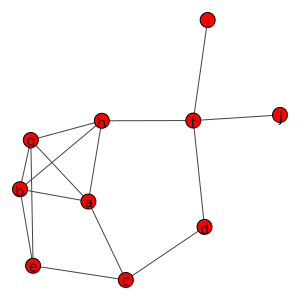

<Figure size 200x200 with 0 Axes>

In [260]:
alphabit = {
    'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3, 'e' : 4, 'f' : 5, 'g' : 6, 'h' : 7, 'i': 8, 'j' : 9
}

adj2alph_map = [
    ('a', 'h', 8), 
    ('b', 'a', 3),
    ('c', 'a', 5), ('c', 'd', 5), ('c', 'e', 1),
    ('d', 'c', 6), ('d', 'f', 1),
    ('e', 'b', 6), ('e', 'c', 2),
    ('g', 'a', 7), ('g', 'b', 4), ('g', 'e', 8), ('g', 'h', 3),
    ('h', 'b', 3), ('h', 'f', 9),
    ('i', 'f', 4), ('j', 'f', 1)
]

adjacency_matrix = np.zeros(shape=(len(alphabit), len(alphabit)), dtype=int)

# create graph
for v1, v2, weight in adj2alph_map:
    adjacency_matrix[alphabit[v1], alphabit[v2]] = weight
    
g = igraph.Graph.Adjacency((adjacency_matrix > 0).tolist())
g.vs['names'] = [key for key in alphabit.keys()]
g.es['weight'] = adjacency_matrix[adjacency_matrix.nonzero()]

G = nx.Graph(adjacency_matrix)
G = igraph.Graph.from_networkx(G)
G.vs['names'] = [key for key in alphabit.keys()]
#G.es['names'] = [key for key in alphabit.keys()]
  
# plot the graph
plt.figure(figsize=(2, 2))
igraph.plot(G,
        vertex_size=15,
        vertex_label=g.vs['names'],
        bbox=(300, 300)
        )

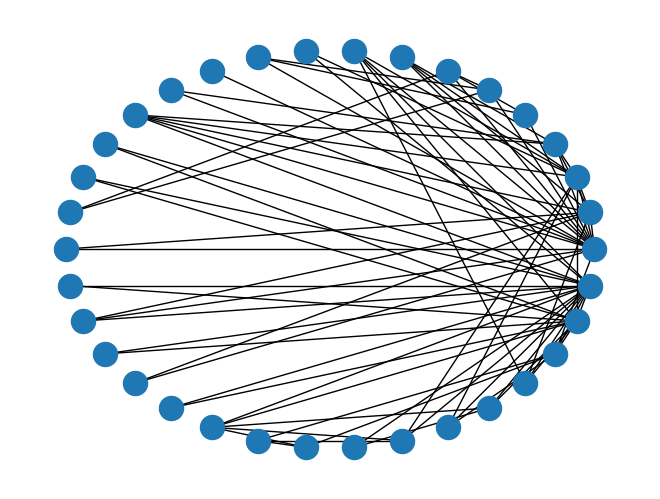

In [3]:
G = nx.karate_club_graph()
nx.draw_circular(G)

In [13]:
# USE KARATE CLUB
G = nx.karate_club_graph()
G = igraph.Graph.from_networkx(G)
G.vs['names'] = [num for num in range(G.get_adjacency().shape[0])]

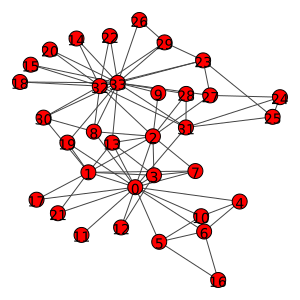

<Figure size 200x200 with 0 Axes>

In [47]:
# plot the graph
plt.figure(figsize=(2, 2))
igraph.plot(G,
        vertex_size=15,
        vertex_label=G.vs['names'],
        bbox=(300, 300)
        )

In [14]:
# a) vertices walking
triangle_counter = 0
edge_list = G.get_edgelist()

for vertex in G.vs:
    for neighbour1, neighbour2 in combinations(vertex.neighbors(), 2):
        if (neighbour1['_nx_name'], neighbour2['_nx_name']) in edge_list:
            triangle_counter += 1
# since there're no rearrangements we divide only 3, not 6
print(f'Triangles in by counting vertices : {int(triangle_counter/3)}, true : {len(G.list_triangles())}')

Triangles in by counting vertices : 45, true : 45


In [15]:
# b) edge walking
triangle_counter = 0
edge_list = G.get_edgelist()

for (edge1, edge2, edge3) in combinations(G.es, 3):
    pair1 = set({edge1.vertex_tuple[0]['names'], edge1.vertex_tuple[1]['names']})
    pair2 = set({edge2.vertex_tuple[0]['names'], edge2.vertex_tuple[1]['names']})
    pair3 = set({edge3.vertex_tuple[0]['names'], edge3.vertex_tuple[1]['names']})
    if len(pair1.union(pair2).union(pair3)) == 3:
        triangle_counter += 1
print(f'Triangles in by counting vertices : {int(triangle_counter)}, true : {len(G.list_triangles())}')

Triangles in by counting vertices : 45, true : 45


In [24]:
alphabit = {x: x for x in range(G.get_adjacency().shape[0])}

In [19]:
rho = 3
V_rhos = [v for v in list(combinations(G.vs['names'], rho))]
E_rhos = {}
for i, v in enumerate(V_rhos):
    E_rhos[i] = []
    decoded_v = set(i for i in map(lambda x: alphabit[x], v))
    #print(decoded_v)
    for pair in G.get_edgelist():
        #print(pair)
        if len(decoded_v.intersection(set(pair))) == 2:
            #print(decoded_v, pair)
            E_rhos[i].append(pair)

In [40]:
# graph breaking
triangle_counter = 0

rho = 3
V_rhos = [set(v) for v in list(combinations(G.vs['names'], rho))]
E_rhos = {}
for i, v in enumerate(V_rhos):
    E_rhos[i] = []
    decoded_v = set(i for i in map(lambda x: alphabit[x], v))
    #print(decoded_v)
    for pair in G.get_edgelist():
        #print(pair)
        if len(decoded_v.intersection(set(pair))) == 2:
            #print(decoded_v, pair)
            E_rhos[i].append(pair)
G_rhos = []
for i, Edge in E_rhos.items():
    r = nx.Graph()
    for edge in Edge:
        for v in V_rhos[i]:
            r.add_node(v)
        r.add_edge(edge[0], edge[1]), r.add_edge(edge[1], edge[0])
        
    r = igraph.Graph.from_networkx(r)
    r.vs['names'] = [key for key in V_rhos[i]]
    G_rhos.append(r)
    triangle_counter += len(r.list_triangles())
print(f'Triangles in by counting vertices : {int(triangle_counter)}, true : {len(G.list_triangles())}')

Triangles in by counting vertices : 45, true : 45


In [41]:
V_pairs = [set(v) for v in list(combinations(G.vs['names'], 2))]
V_singles = G.vs['names']

# implement universal hash function
universal_hash_func = lambda x: x
max_v = -float('inf')
min_v = float('inf')
for pair in V_pairs:
    for v in pair:
        max_v = max(max_v, universal_hash_func(v))
        min_v = min(min_v, universal_hash_func(v))
universal_hash_func = lambda x: round( (x-min_v)/(max_v-min_v) * (rho-1), 3)

In [42]:
abc_uv_dict = {}
coded_uvs = [universal_hash_func(v) for v in V_singles]
for pair in V_pairs:
    ij = [0, 0]
    for k, v in enumerate(pair):
        ij[k] = universal_hash_func(v)

    for a in coded_uvs:
        for b in coded_uvs:
            if (a+1) <= b <= (rho-1):
                for c in coded_uvs:
                    if (b+1) <= c <= (rho-1):
                        if ij[0] in [a,b,c] and ij[1] in [a,b,c]:
                            pass #print('true')
                        #print(f'finally : {a,b,c}')
                        

In [43]:
def map_func(pair):
    ij = [0, 0]
    for k, v in enumerate(pair):
        ij[k] = universal_hash_func(v)

    for a in coded_uvs:
        for b in coded_uvs:
            if (a+1) <= b <= (rho-1):
                for c in coded_uvs:
                    if (b+1) <= c <= (rho-1):
                        if ij[0] in [a,b,c] and ij[1] in [a,b,c]:
                            #print(ij, a,b,c)
                            return (a,b,c), pair

In [44]:
def reduce(V_rhos, E_rhos, G_rhos):
    total_triangles = 0
    for v_rho, e_rho, g_rho in zip(V_rhos, E_rhos, G_rhos):
        #print(v_rho, e_rho, g_rho.vs['names'])
        triangles = g_rho.list_triangles()
        #print(triangles)
        for triangle in triangles:
            z = 1
            u, v, w = triangle
            u, v, w = [v for v in map(lambda x: G.vs['names'][x], triangle)]
            if universal_hash_func(u) == universal_hash_func(v) == universal_hash_func(w):
                print('real?')
            elif universal_hash_func(u) == universal_hash_func(v) or\
                    universal_hash_func(w) == universal_hash_func(v) or\
                    universal_hash_func(u) == universal_hash_func(w):
                z = rho - 2
            total_triangles += 1/z
    return int(total_triangles)

In [45]:
reduce(V_rhos, E_rhos, G_rhos)

45

#### TASK 3

In [290]:
# average length of path in graph
# local and global clusterization coefficient
# average vertices degree
g = nx.Graph(adjacency_matrix)
g_ag_path = G.average_path_length()
glob_clusterization = nx.transitivity(g)
loc_clusterization = nx.clustering(g)
avg_degree = nx.average_degree_connectivity(g)
print(f'Average path length = {g_ag_path}')
print(f'Global clusterization = {glob_clusterization}\nlocal = {loc_clusterization}')
print(f'Average vertices degree = {avg_degree}')

Average path length = 2.0
Global clusterization = 0.40540540540540543
local = {0: 0.5, 1: 0.6666666666666666, 2: 0, 3: 0, 4: 0.3333333333333333, 5: 0, 6: 0.6666666666666666, 7: 0.5, 8: 0, 9: 0}
Average vertices degree = {4: 3.45, 3: 3.3333333333333335, 2: 3.5, 1: 4.0}


#### TASK 4


Spectrum of the graph (the set of eigenvalues of adjacency matrix) =
[ 1.86782105e+01  9.01894691e+00  6.34091004e+00  2.27732207e+00
  4.76968033e-34 -1.60393257e+00 -3.98613708e+00 -5.87081167e+00
 -1.12896889e+01 -1.35648192e+01]

Spectrum gap = 9.659263549768331

Laplacian spectrum =
[34.724490435093216, 30.57749196836052, 21.367605700299055, 19.71281320738895, 15.18636052645419, 10.576044569441507, 4.15740241160551, 2.702734462586293, 0.9950567187707337, -9.153334489722853e-17]

Graph energy = 72.63077894210706

Graph spectral radius = 18.6782104578565

Spectral 1st moment = -2.3092638912203257e-15

Spectral 2nd moment = 84.00000000000013


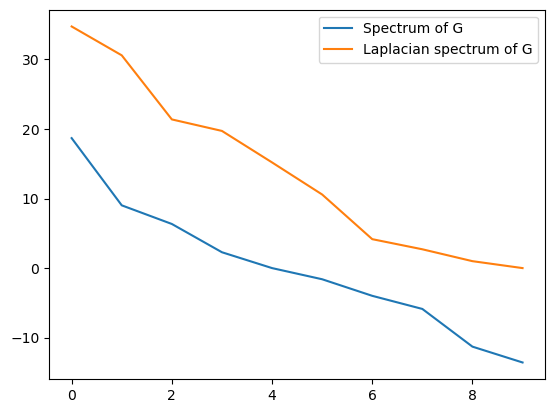

In [315]:
# calculate spectrum, laplasian spectrum of the graph
# plot the spuctrums
# find spectral gap, radius,spectral k-moments
g_spectrum = np.array(sorted(nx.spectrum.adjacency_spectrum(g).real, reverse=True))
g_lapl_spectrum = sorted(nx.spectrum.laplacian_spectrum(g).real, reverse=True)
g_graph_energy = np.sum(np.abs(g_spectrum))
g_spectral_radius = np.max(np.abs(g_spectrum))
g_spectral_moment = lambda k: ( g_spectrum ** k ).mean()
print(f'\nSpectrum of the graph (the set of eigenvalues of adjacency matrix) =\n{g_spectrum}')
print(f'\nSpectrum gap = {g_spectrum[0] - g_spectrum[1]}')
print(f'\nLaplacian spectrum =\n{g_lapl_spectrum}')
print(f'\nGraph energy = {g_graph_energy}')
print(f'\nGraph spectral radius = {g_spectral_radius}')
print(f'\nSpectral 1st moment = {g_spectral_moment(1)}')
print(f'\nSpectral 2nd moment = {g_spectral_moment(2)}')
plt.plot(g_spectrum, label='Spectrum of G')
plt.plot(g_lapl_spectrum, label='Laplacian spectrum of G')
plt.legend()

According to the plot above, we see that the eigenvalues of adjacency matrix and laplacian are similar except the extracted constant.

#### TASK 5

In [1]:
import karateclub

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core.multiarray failed to import

In [ ]:
import 

In [4]:
pip install karateclub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 470.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 21.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.3 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for python-Levenshtein from https://files.pythonhosted.org/packages/27/89/c45dbdbd4

(array([2., 0., 0., 1., 0., 0., 2., 0., 0., 5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

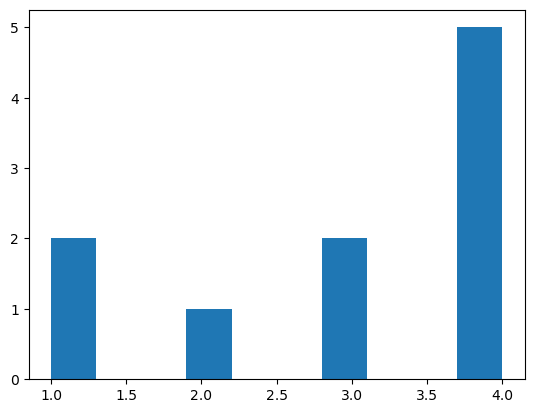

In [337]:
# plot empirical distribution of degrees
plt.hist(G.degree())

In [2]:
!pip install snap-stanford

ERROR: Could not find a version that satisfies the requirement snap-stanford (from versions: none)
ERROR: No matching distribution found for snap-stanford
